In [47]:
import numpy as np
import math
import xgboost as xgb
from sklearn import datasets
import matplotlib.pyplot as plt


In [16]:
print("hello")

hello


In [40]:
#df_train = xgb.DMatrix('demo/data/agaricus.txt.train')
#df_train = xgb.DMatrix('demo/data/agaricus.txt.test')

### TODO prepare different loading methods 
#dtrain = xgb.DMatrix('train.csv?format=csv&label_column=0')
#dtest = xgb.DMatrix('test.csv?format=csv&label_column=0')
### note no support for categorical values -> numpy one hot encoding
iris = datasets.load_iris()
x = iris.data
y = iris.target

idx = np.random.permutation(len(y))
train_split = math.floor(len(idx) * 0.7)
val_split = math.floor(len(idx) * 0.9)

x_train, y_train = x[:train_split] , y[:train_split]
x_val, y_val =x[train_split:val_split], y[train_split:val_split]
x_test, y_test = x[val_split:], y[val_split:]


df_train = xgb.DMatrix(x_train, label=y_train)
df_val = xgb.DMatrix(x_val, label=y_val)
df_test = xgb.DMatrix(x_test, label=y_test)

evallist = [(df_test, 'eval'), (df_train, 'train')]

In [51]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax', 'num_class':3}
param['nthread'] = 4
#param['eval_metric'] = ['merror']
num_rounds= 2

most relevant parameters  https://xgboost.readthedocs.io/en/latest/parameter.html
- max depth 
- eta lr 
- num_round


[0]	eval-merror:0.13333	train-merror:0.00952
[1]	eval-merror:0.13333	train-merror:0.00000


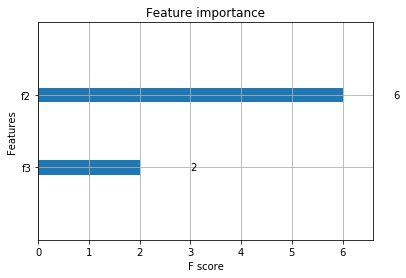

In [52]:
bst = xgb.train(param, df_train, num_rounds, evallist)
bst.save_model('0001.model')
bst.dump_model('dump.raw.txt')#, 'featmap.txt')
xgb.plot_importance(bst)
plt.show()